In [1]:
import numpy as np
import pandas as pd
import cv2
import pytesseract
import matplotlib.pyplot as plt
from glob import glob
from tqdm import tqdm

### Processing images and using pytesseract to apply ocr

In [2]:
imgsPath = ['data/img9251.png','data/img1747.png','data/img8958.png','data/img6421.png','data/img9841.png','data/img8908.png','data/img1081.png','data/img4213.png','data/img6489.png','data/img7754.png','data/img6399.png','data/img4330.png','data/img3492.png','data/img9672.png','data/img2117.png','data/img8485.png','data/img4492.png','data/img2432.png','data/img7177.png','data/img4369.png','data/img9608.png','data/img1208.png','data/img939.png','data/img4181.png','data/img9428.png','data/img2378.png','data/img6552.png','data/img3340.png','data/img308.png','data/img7878.png','data/img3985.png','data/img454.png','data/img458.png','data/img6040.png','data/img1010.png','data/img9105.png','data/img2925.png','data/img8370.png','data/img9550.png','data/img3345.png','data/img4768.png','data/img8243.png','data/img1487.png','data/img6143.png','data/img5172.png','data/img5588.png','data/img8125.png']

In [3]:
images = [(cv2.imread(file), str(file)) for file in imgsPath]

Text(0.5, 1.0, 'data/img8125.png')

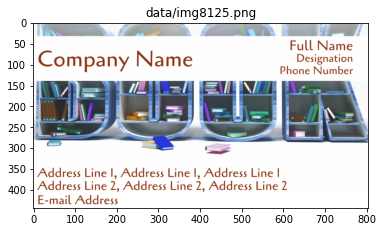

In [4]:
plt.imshow(images[-1][0])
plt.title(images[-1][1])

In [5]:
print(type(images[0][0]), type(images[0][1]))
print(len(images[0][0]))

<class 'numpy.ndarray'> <class 'str'>
444


In [6]:
# Pandas Dataframe to store predictions as text and corresponding image ids.
businessCards = pd.DataFrame(columns=['id', 'text'])

#iterating over all images in the dataset to do ocr
for image in tqdm(images, desc='cardInfo'):
    
    # Using pytesseract to convert images to data.
    dat = pytesseract.image_to_data(image[0])
    
    # splitting by /n and /t so the data might make sense n  we'd be able to format it as a dataframe
    vals = list(map(lambda x: x.split('\t'), dat.split('\n')))
    df = pd.DataFrame(vals[1:], columns=vals[0])
    df.dropna(inplace = True)
    
    # converting the dtype from object to int so we might apply conditions 
    df ['conf'] = df['conf'].astype(int)
    
    # taking predictions only with above the below threshold.
    filtr = df.query('conf >= 65')
    
    # creating this datframe so we might use it for concatenation
    cardInfo = pd.DataFrame()
    cardInfo['text'] = filtr['text']
    cardInfo ['id'] = image[1]
    
    businessCards = pd.concat((businessCards, cardInfo))

cardInfo: 100%|██████████| 47/47 [00:17<00:00,  2.61it/s]


In [7]:
businessCards.head(5)

,id,text
4,data/img9251.png,
8,data/img9251.png,Full
9,data/img9251.png,Name
11,data/img9251.png,Designation
13,data/img9251.png,Phone


In [8]:
# exporting it as a csv
businessCards.to_csv('businessCards.csv', index=False)

### taking the saved file and preparing it for scipy

In [9]:
with open ('businessCards.csv', mode='r') as f:
    dat = f.read()

In [10]:
vals = list(map( lambda x: x.split('\t'), dat.split('\n') ))

In [11]:
df = pd.DataFrame(vals[1:], columns = vals[0])

In [12]:
df.head()

,"id,text,tag"
0,"data/img9251.png,Full,B-NAME"
1,"data/img9251.png,Name,I-NAME"
2,"data/img9251.png,Designation,B-DES"
3,"data/img9251.png,Phone,B-PHON"
4,"data/img9251.png,Number,I-PHON"


In [13]:
df = pd.read_csv('businessCards - businessCards.csv')
df.head()

,id,text,tag
0,data/img9251.png,Full,B-NAME
1,data/img9251.png,Name,I-NAME
2,data/img9251.png,Designation,B-DES
3,data/img9251.png,Phone,B-PHON
4,data/img9251.png,Number,I-PHON


In [14]:
import string

In [15]:
whitespace = string.whitespace
punc = '!#$%&\'()*+:;<=>?[\\]^_`{|}~'

tableWhitespace = str.maketrans('','', whitespace)
tablePunc = str.maketrans('','', punc)

def cleanText(txt):
    text = str(txt)
    text = text.lower()
    
    removeWhitespace = text.translate(tableWhitespace)
    removePunc = removeWhitespace.translate(tablePunc)
    
    return str(removePunc)

In [16]:
df['text'] = df['text'].apply(cleanText)

In [17]:
df

,id,text,tag
0,data/img9251.png,full,B-NAME
1,data/img9251.png,name,I-NAME
2,data/img9251.png,designation,B-DES
3,data/img9251.png,phone,B-PHON
4,data/img9251.png,number,I-PHON
...,...,...,...
934,data/img8125.png,address,I-ADD
935,data/img8125.png,line,I-ADD
936,data/img8125.png,2,I-ADD
937,data/img8125.png,e-mail,B-MAIL


In [18]:
dataClean = df.query("text != ''")
dataClean.dropna(inplace=True)

In [19]:
group = dataClean.groupby(by='id')
cards = group.groups.keys()

In [20]:
dataClean.head(50)

,id,text,tag
0,data/img9251.png,full,B-NAME
1,data/img9251.png,name,I-NAME
2,data/img9251.png,designation,B-DES
3,data/img9251.png,phone,B-PHON
4,data/img9251.png,number,I-PHON
5,data/img9251.png,address,B-ADD
6,data/img9251.png,line,I-ADD
7,data/img9251.png,"1,",I-ADD
8,data/img9251.png,address,I-ADD
9,data/img9251.png,line,I-ADD


In [21]:
allCardData = []

# Iterating over all the cards / images 
for card in cards:
    # Get all the rows of the card/image and than use text and tag for further processing
    cardVals = group.get_group(card)[['text','tag']].values
    
    content = ''
    annotations = {'entities': []}
    
    
    start = 0
    end = 0
    
    
    for text, tag in cardVals:
        # converting to string format.
        text = str(text)
        
        #so satrt is now end (1st iteration end = 0)
        start = end
        # end is total len of the text +1 for extra space
        end = start + (len(text)+1)
        
        # No need to do annotations for 'O'; meaningless
        if tag != 'O' and tag != None and tag != "":
            annot = (start, end-1, tag)
            annotations['entities'].append(annot)
            
        
        # all text from a single image
        content = content + text + ' '
        
        # tuple to contain both content and annotations
        cardData = (content, annotations)
        
        # appending the current cardData to 
        allCardData.append(cardData)

In [22]:
for i in allCardData:
    print (i)

('designation ', {'entities': [(0, 11, 'B-DES'), (12, 19, 'B-COMP'), (20, 24, 'I-COMP'), (25, 32, 'B-ADD'), (33, 37, 'I-ADD'), (38, 40, 'I-ADD'), (41, 48, 'I-ADD'), (49, 56, 'I-ADD'), (57, 61, 'I-ADD'), (62, 64, 'I-ADD'), (65, 72, 'I-ADD'), (73, 77, 'I-ADD'), (78, 79, 'I-ADD'), (80, 86, 'B-MAIL'), (87, 94, 'I-MAIL')]})
('designation company ', {'entities': [(0, 11, 'B-DES'), (12, 19, 'B-COMP'), (20, 24, 'I-COMP'), (25, 32, 'B-ADD'), (33, 37, 'I-ADD'), (38, 40, 'I-ADD'), (41, 48, 'I-ADD'), (49, 56, 'I-ADD'), (57, 61, 'I-ADD'), (62, 64, 'I-ADD'), (65, 72, 'I-ADD'), (73, 77, 'I-ADD'), (78, 79, 'I-ADD'), (80, 86, 'B-MAIL'), (87, 94, 'I-MAIL')]})
('designation company name ', {'entities': [(0, 11, 'B-DES'), (12, 19, 'B-COMP'), (20, 24, 'I-COMP'), (25, 32, 'B-ADD'), (33, 37, 'I-ADD'), (38, 40, 'I-ADD'), (41, 48, 'I-ADD'), (49, 56, 'I-ADD'), (57, 61, 'I-ADD'), (62, 64, 'I-ADD'), (65, 72, 'I-ADD'), (73, 77, 'I-ADD'), (78, 79, 'I-ADD'), (80, 86, 'B-MAIL'), (87, 94, 'I-MAIL')]})
('designation co

In [23]:
content

'im sdfsdf your name desigination 91-0000000000 youmailid@gmail.com your address location ssd landmark '

In [24]:
803+141

944

In [25]:
leng = int( len(allCardData) * 0.15)
test = allCardData [:leng]
train = allCardData[leng:]
print(len(train), len(test))

799 140


In [26]:
import pickle as pkl

pkl.dump(train, open('./files/train.pickle','wb'))
pkl.dump(test, open('./files/test.pickle','wb'))